<a href="https://colab.research.google.com/github/Edersao/Curso_Data_Scientist/blob/main/trazado_tabla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#para no batallar con .head()
pd.options.display.max_rows = 8
pd.options.display.max_columns = 10

Mounted at /content/drive


Filtremos el dataframe languages
para mantener la información de los idiomas español, inglés, chino, francés, ruso, italiano y alemán:

In [2]:
languages=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/visualizacion/1697822132309-Languages.csv')
languages

,CountryCode,Language,IsOfficial,Percentage
0,ABW,Dutch,T,5.3
1,ABW,English,F,9.5
2,ABW,Papiamento,F,76.7
3,ABW,Spanish,F,7.4
...,...,...,...,...
980,ZWE,English,T,2.2
981,ZWE,Ndebele,F,16.2
982,ZWE,Nyanja,F,2.2
983,ZWE,Shona,F,72.1


In [3]:
some_languages = languages.loc[languages['Language'].isin(['Spanish','English','Chinese','French','Russian','Italian',
'German'])]
some_languages.head()

,CountryCode,Language,IsOfficial,Percentage
1,ABW,English,F,9.5
3,ABW,Spanish,F,7.4
18,AIA,English,T,0.0
23,AND,French,F,6.2
25,AND,Spanish,F,44.6


Usemos una gráfica de barras para determinar el conteo o frecuencia de cada idioma. Si recuerdas, anteriormente revisamos que la única plataforma que ofrece una función directa de trazado con este fin es Seaborn: countplot(). En Matplotlib y Pandas usamos value_counts() como auxiliar en las funciones bar() y plot.bar(), respectivamente, para obtener los mismos resultados.

<ipython-input-5-22456b3a9603>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Language',data=some_languages,palette='pastel')


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'English'),
  Text(1, 0, 'Spanish'),
  Text(2, 0, 'French'),
  Text(3, 0, 'Italian'),
  Text(4, 0, 'German'),
  Text(5, 0, 'Russian'),
  Text(6, 0, 'Chinese')])

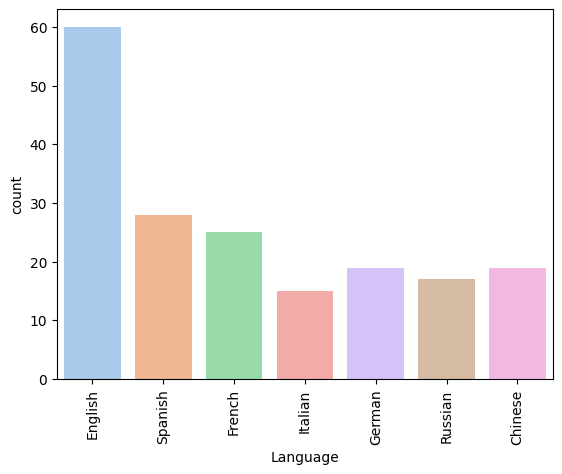

In [5]:
#sns.set_palette('Spectral')
#sns.set_style('ticks')
sns.countplot(x='Language',data=some_languages,palette='pastel')
plt.xticks(rotation=90)

En la figura resultante se observa que el idioma predominante es el inglés (casi 60 países lo incluyen como parte de sus lenguas), seguido por el español y el francés. Ahora, si quisieras
incluir los valores numéricos en el gráfico, podrías utilizar la función text() o una tabla de datos en el eje horizontal, como veremos a continuación. Pero antes, es necesario generar el
dataframe con los conteos por idioma. Para ello, hemos utilizado ya dos formas: con la función value_counts() y con groupby(). Recordemos cómo:

In [10]:
#Con value_count
counts = pd.DataFrame(some_languages['Language'].value_counts())
counts

,Language
English,60
Spanish,28
French,25
German,19
Chinese,19
Russian,17
Italian,15


In [9]:
#Con groupby
counts =some_languages.groupby(['Language']).count()[['CountryCode']]
counts

,CountryCode
Language,
Chinese,19
English,60
French,25
German,19
Italian,15
Russian,17
Spanish,28


In [11]:
counts.index.name = 'Language'
counts.columns = ['Count']
counts

,Count
Language,
English,60
Spanish,28
French,25
German,19
Chinese,19
Russian,17
Italian,15


In [12]:
counts_T=counts.T
counts_T

Language,English,Spanish,French,German,Chinese,Russian,Italian
Count,60,28,25,19,19,17,15


Incluimos la tabla en el gráfico de barras con las diferentes plataformas:

([], [])

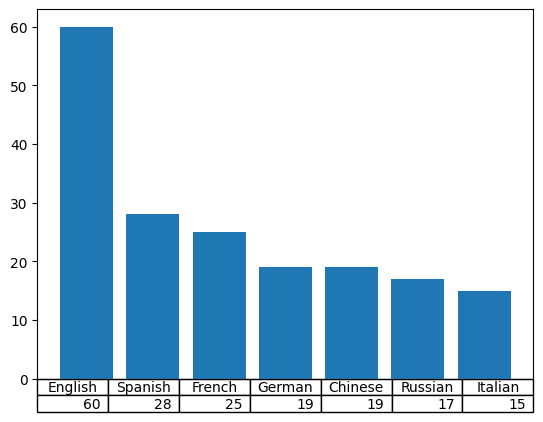

In [14]:
#Con Matplotlib
plt.bar(counts.index,'Count',data=counts)
plt.table(cellText=counts_T.values,colLabels=counts_T.columns)
plt.xticks([])

<Axes: >

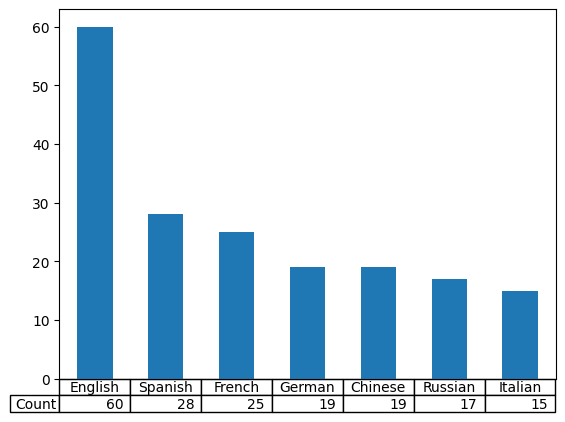

In [15]:
#Con Pandas
counts.plot(kind='bar',table=True,xticks=[],xlabel='',legend='')

<ipython-input-19-f4ec30e0f967>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index,y='Count',data=counts,palette='pastel')


Text(0.5, 0, '')

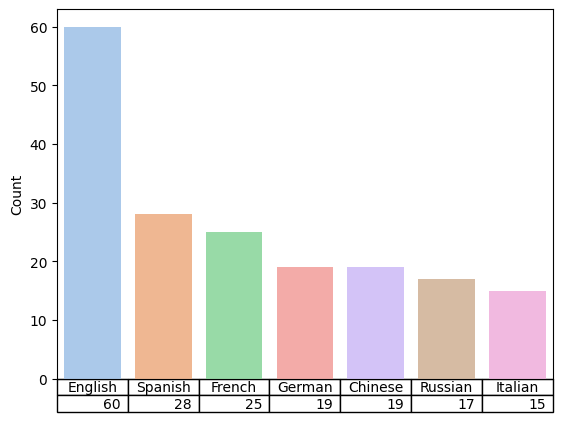

In [19]:
#Con Seaborn
sns.barplot(x=counts.index,y='Count',data=counts,palette='pastel')
plt.table(cellText=counts_T.values,colLabels=counts_T.columns)
plt.xticks([])
plt.xlabel('')

- En Matplotlib y Seaborn ocupamos el dataframe counts_T para construir la tabla y pasamos una lista vacía a la función xticks() para omitir las marcas del eje x.

- La función plot() de Pandas posee el parámetro table para incluir la tabla de datos directamente, sin necesidad de la transpuesta, y los parámetros xticks y xlabel para ocultar los valores del eje x. Sin embargo, si deseas personalizar su estructrura o formato, deberás usar table() de Matplotlib.

- En Seaborn ya no es necesario ocupar countplot(), como inicialmente lo hicimos,
porque se tiene el conteo en el dataframe counts y es éste el que se grafica.

# Propiedades de la tabla
Si queremos incluir encabezados para los registros o filas, se utiliza la propiedad __rowLabels__:

<ipython-input-25-e14bdde4d536>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index,y='Count',data=counts,palette='pastel')


Text(0.5, 0, '')

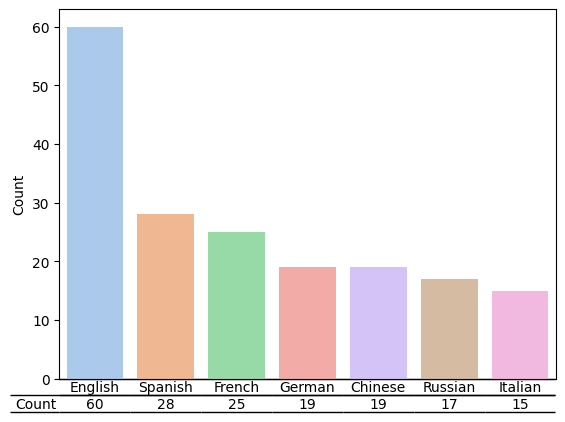

In [25]:
sns.barplot(x=counts.index,y='Count',data=counts,palette='pastel')
plt.table(cellText=counts_T.values,colLabels=counts_T.columns,rowLabels=counts_T.index,cellLoc='center',edges='horizontal')
plt.xticks([])
plt.xlabel('')

También puedes especificar la alineación de las celdas con **cellLoc** y podrías hacer lo mismo con los encabezados de filas y columnas, utilizando **rowLoc** y **colLoc**,respectivamente.

El parámetro **edges** te permite indicar qué líneas de la tabla incluir. En este ejemplo, únicamente mostramos las horizontales, pero podrías usar:
*'open'* sin líneas, *'closed'* todas las líneas, *'vertical'* líneas verticales.

Cuando la tabla posee todas las líneas (**closed** como valor por defecto), es posible colorear las celdas de los encabezados, a través de los parámetros *rowColours* y *colColours*:

([], [])

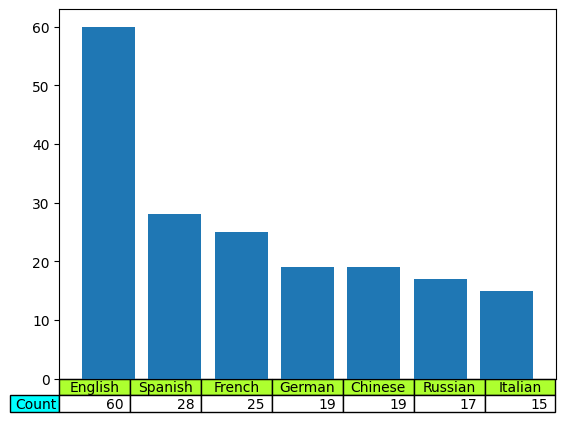

In [26]:
plt.bar(counts.index,'Count',data=counts)
plt.table(cellText=counts_T.values,colLabels=counts_T.columns,rowLabels=counts_T.index,rowColours=['cyan'],colColours=['greenyellow']*7)
plt.xticks([])
#Aquí se ha usado el mismo color para todas las columnas (indicado por el 7 en colColours),
#pero podrías asignar un color particular a cada una, incluyéndolos en la lista.

Para cambiar el tamaño de la letra, debes hacerlo con las propiedades del objeto tabla creado con la función table() e identificado en el código como t:

<ipython-input-27-f88b6380594b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index,y='Count',data=counts,palette='pastel')


Text(0.5, 0, '')

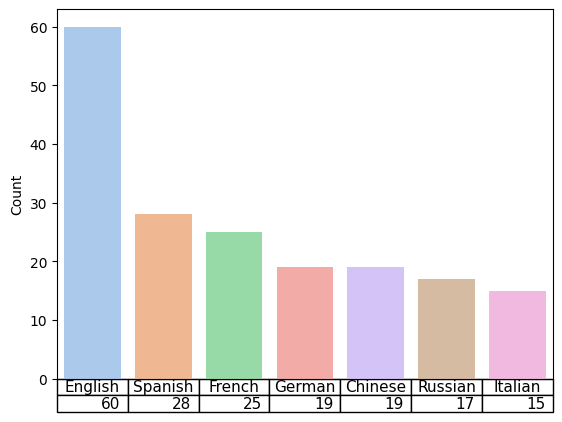

In [27]:
sns.barplot(x=counts.index,y='Count',data=counts,palette='pastel')
t = plt.table(cellText=counts_T.values,colLabels=counts_T.columns)
t.auto_set_font_size(False)
t.set_fontsize(11)
plt.xticks([])
plt.xlabel('')

Antes de especificar el tamaño de la letra, deshabilita el autoajuste, que reduce el tamaño de la fuente hasta que el texto se ajusta al ancho de la celda.

También puedes indexar directamente el objeto tabla para acceder a celdas individuales, como lo haces con las matrices: cell = table[row,col]. Una vez referenciada la celda, podrías darle el formato que desees.

Por ejemplo, para hacer énfasis en el español, tendrías que indicar row = 1 y col = 1 recuerda que los índices siempre inician con 0):

([], [])

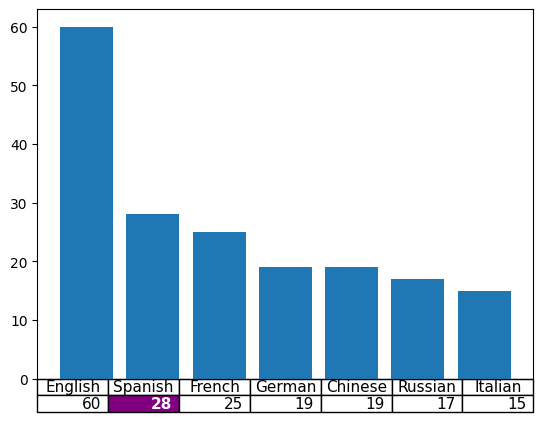

In [28]:
plt.bar(counts.index,'Count',data=counts)
t = plt.table(cellText=counts_T.values,colLabels=counts_T.columns)
t.auto_set_font_size(False)
t.set_fontsize(11)
cell = t[1,1]
cell.set_text_props(weight='bold',color='white')
cell.set_facecolor('purple')
plt.xticks([])

Para dar formato a varias celdas, tendrías que hacer un recorrido por la tabla, usando un ciclo y ocupando la función get_celld(), que devuelve un diccionario de celdas con el mapeo de la tabla (fila, columna) a celdas:

([], [])

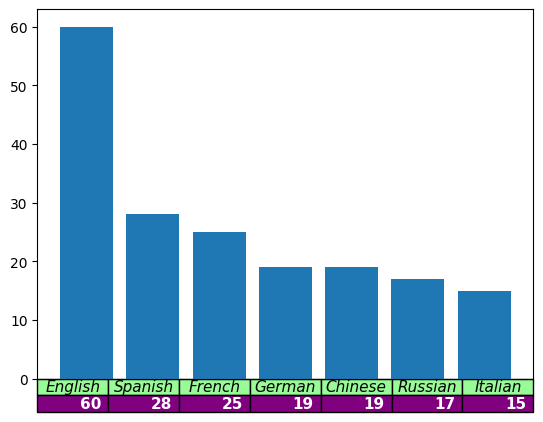

In [31]:
plt.bar(counts.index,'Count',data=counts)
t = plt.table(cellText=counts_T.values,colLabels=counts_T.columns)
t.auto_set_font_size(False)
t.set_fontsize(11)
cell = t[1,1]
for (row,col), cell in t.get_celld().items():
  if (row == 0):
    cell.set_text_props(weight='light',style='italic')
    cell.set_facecolor('palegreen')
  else:
    cell.set_text_props(weight='bold',color='white')
    cell.set_facecolor('purple')
plt.xticks([])

El cambio de color también puede resultar conveniente cuando se están representando varias series de datos, porque puede ocuparse en sustitución de la leyenda. Para ejemplificarlo, divide el conteo anterior, en países, donde el idioma se habla como lengua oficial o no:

In [43]:
counts_isofficial = some_languages.groupby(['IsOfficial','Language']).count()[['CountryCode']]
counts_isofficial.columns=['Count']
counts_isofficial

Count
IsOfficial Language       
F          Chinese      17
           English      16
           French        7
           German       13
...                    ...
T          German        6
           Italian       4
           Russian       3
           Spanish      20

[14 rows x 1 columns]

Acomodamos la información de forma tal que los conteos queden en columnas independientes haciendo diferenciación por el valor de la columna IsOfficial:

In [44]:
counts_isofficial =counts_isofficial.iloc[: 7,:].merge(counts_isofficial.iloc[7:,:],
                                                       on='Language',suffixes=('_F', '_T'))[['Count_F','Count_T']]
counts_isofficial.columns =[ 'NonOfficial','Official']
counts_isofficial

,NonOfficial,Official
Language,,
Chinese,17,2
English,16,44
French,7,18
German,13,6
Italian,11,4
Russian,14,3
Spanish,8,20


Gráficando el dataframe resultante en Pandas

<Axes: >

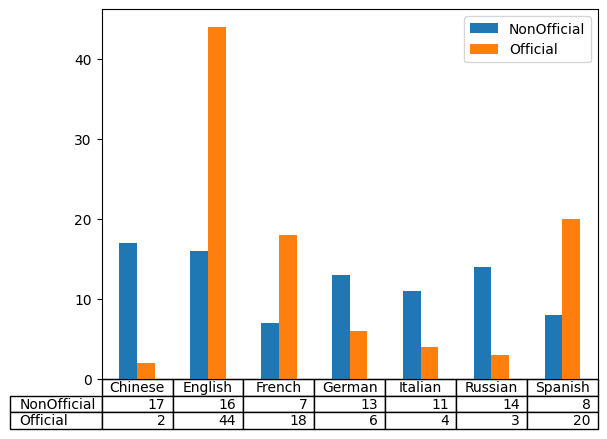

In [45]:
counts_isofficial.plot.bar(table=True,xticks=[],xlabel='')

Para indicar los colores en la tabla, es necesario que uses la función table() de Matplotlib porque plot() de Pandas no permite tal nivel de personalización. No olvides que, en este caso, tendrás que ocupar la propiedad T para obtener la transpuesta:

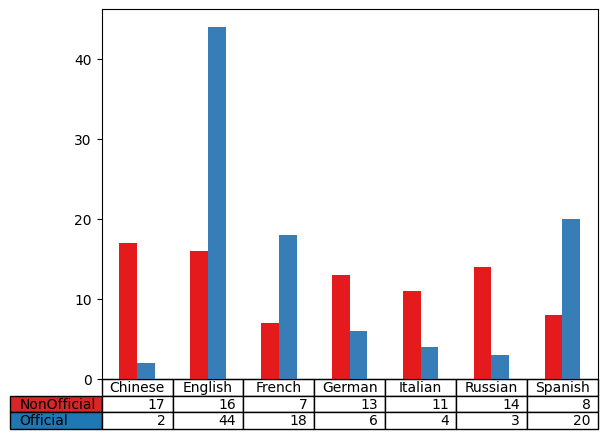

In [48]:
sns.set_palette('Set1')
counts_isofficial.plot.bar(xticks=[],xlabel='',legend='')
counts_isofficial_T = counts_isofficial.T
plt.table(cellText=counts_isofficial_T.values,colLabels=counts_isofficial_T.columns,
          rowLabels=counts_isofficial_T.index,rowColours=['tab:red','tab:blue'])

Aunque en todos los ejemplos previos ubicamos la tabla en el eje horizontal, para utilizar los encabezados de columna como marcas del eje, la posición de la tabla puedes cambiarla a través del parámetro loc:

<ipython-input-49-8f1f9e7cadab>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index,y='Count',data=counts,palette='pastel')


Text(0.5, 0, '')

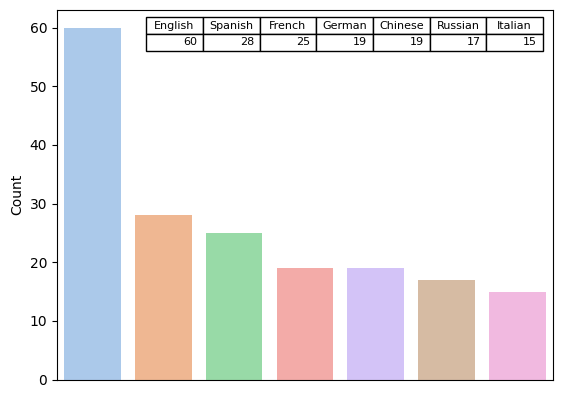

In [49]:
sns.barplot(x=counts.index,y='Count',data=counts,palette='pastel')
t = plt.table(cellText=counts_T.values,colLabels=counts_T.columns,
              loc='upper right')
t.scale(0.8,1)
plt.xticks([])
plt.xlabel('')
#También escalamos la tabla con la función scale(xscale,yscale). Para el ancho
#utiliza un factor de 0.8 que la reduce horizontalmente.
#El alto se ha mantenido con el tamaño original.

Incluso puedes crear una figura sin gráfico con la función subplot(), en la que únicamente incluyas la información contenida en la tabla:

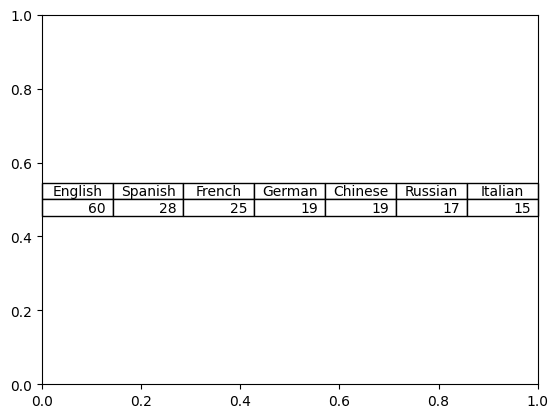

In [55]:
fig,ax = plt.subplots(1,1)

ax.table(cellText=counts_T.values,colLabels=counts_T.columns,loc='center')

Para que no se muestren los ejes, ni sus marcas, utiliza axis('off'):

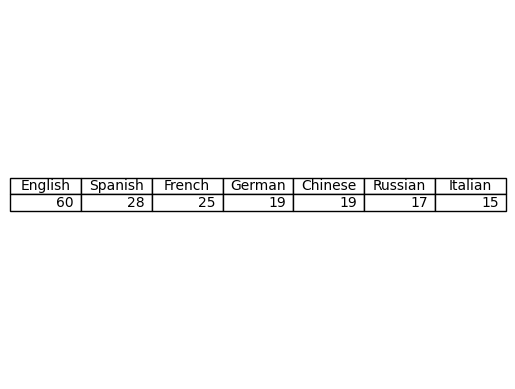

In [54]:
fig,ax = plt.subplots(1,1)
ax.axis('off')
ax.table(cellText=counts_T.values,colLabels=counts_T.columns,loc='center')